In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("Shape of dataframe",data.shape)

Shape of dataframe (1338, 7)


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
#Age category
data.loc[(data["age"] >= 18) & (data["age"] < 36),"yas_grubu"] = "genc"
data.loc[(data["age"] >= 36) & (data["age"] <= 55),"yas_grubu"] = "olgun"
data.loc[(data["age"] >55) ,"yas_grubu"] = "yasli"
data["yas_grubu"].value_counts()

genc     574
olgun    548
yasli    216
Name: yas_grubu, dtype: int64

In [11]:
#weight category
data.loc[data["bmi"] < 18.5,"kilo_durumu"] = "cok zayif"
data.loc[(data["bmi"]>= 18.5)& (data["bmi"] < 25),"kilo_durumu"] = "normal"
data.loc[(data["bmi"] >= 25) & (data["bmi"] < 30),"kilo_durumu"] = "kilolu"
data.loc[data["bmi"] >= 30,"kilo_durumu"] = "obez"
data["kilo_durumu"].value_counts()


obez         707
kilolu       386
normal       225
cok zayif     20
Name: kilo_durumu, dtype: int64

In [12]:
data.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
yas_grubu      0
kilo_durumu    0
dtype: int64

# Görselleştirme

<AxesSubplot:xlabel='sex', ylabel='count'>

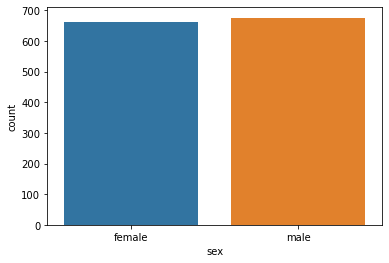

In [13]:
sns.countplot(data["sex"])

Text(0.5, 1.0, 'Sigara İçen Sayısı')

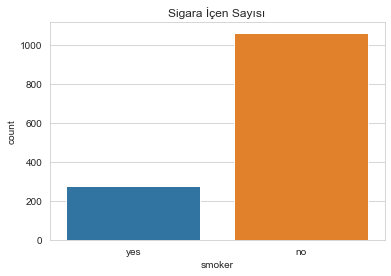

In [59]:
sns.countplot(data["smoker"])
plt.title("Sigara İçen Sayısı")

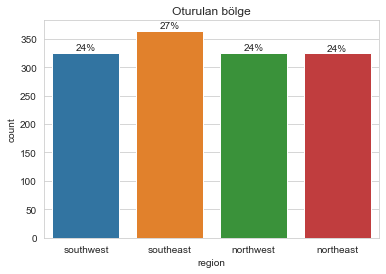

In [58]:
total = len(data)
ax = sns.countplot(data["region"])
plt.title("Oturulan bölge")
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')

Text(0.5, 1.0, 'Yas grubu yüzdelik gösterim')

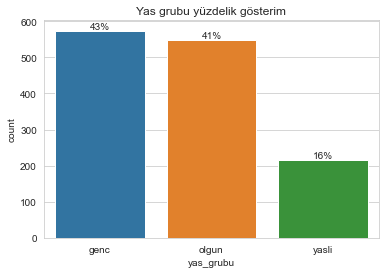

In [56]:
total = len(data)
ax = sns.countplot(x="yas_grubu",data=data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.title("Yas grubu yüzdelik gösterim")

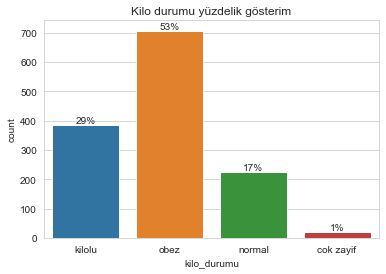

In [57]:
total = len(data)
ax = sns.countplot(x="kilo_durumu", data = data)
plt.title("Kilo durumu yüzdelik gösterim")
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')

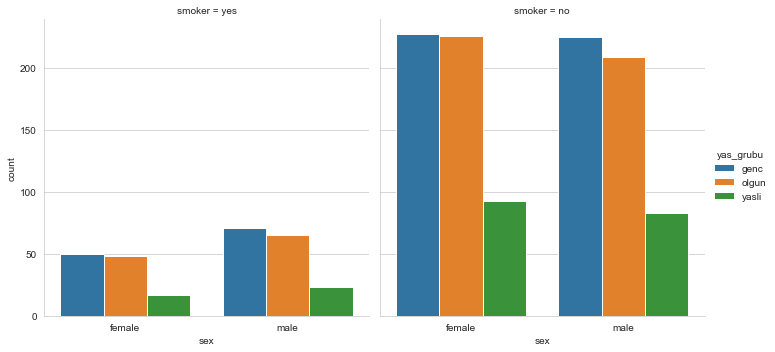

In [18]:
sns.set_style('whitegrid')
sns.catplot('sex', col = 'smoker', hue = 'yas_grubu', data = data, kind = 'count')

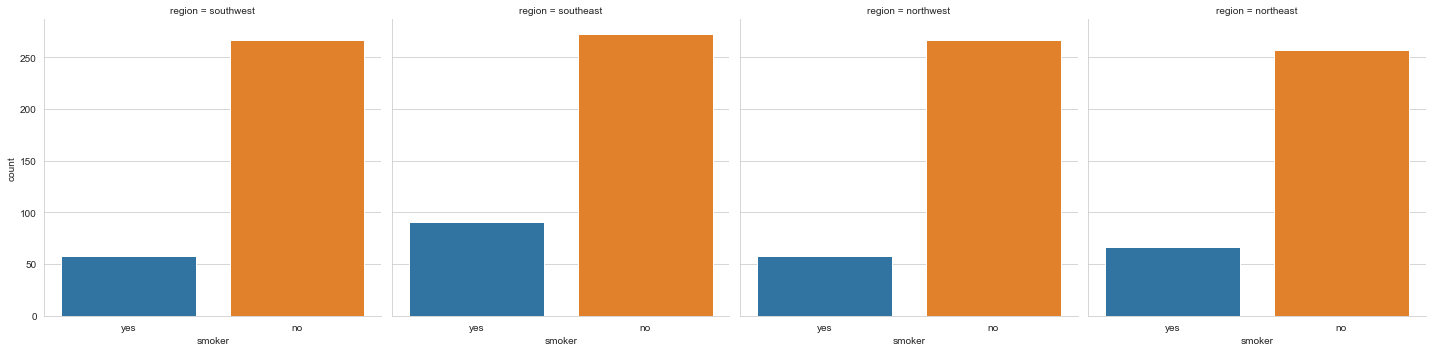

In [19]:
sns.set_style("whitegrid")
sns.catplot(x="smoker",col="region", data = data, kind = "count")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='smoker'>

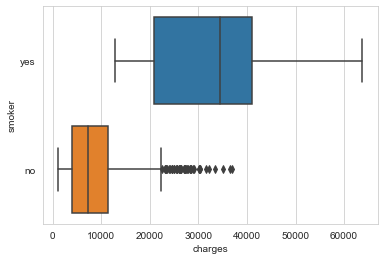

In [47]:
sns.boxplot(x="charges", y="smoker", data=data)

<AxesSubplot:xlabel='charges', ylabel='yas_grubu'>

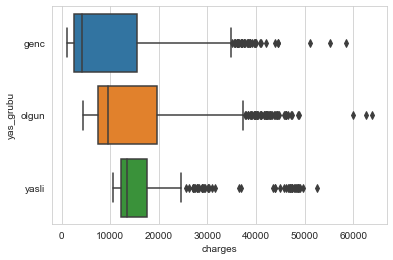

In [46]:
sns.boxplot(x="charges",y="yas_grubu", data=data)

<AxesSubplot:xlabel='charges', ylabel='kilo_durumu'>

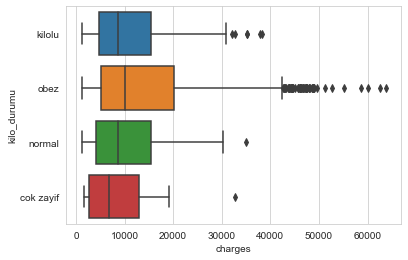

In [48]:
sns.boxplot(x="charges",y="kilo_durumu", data = data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

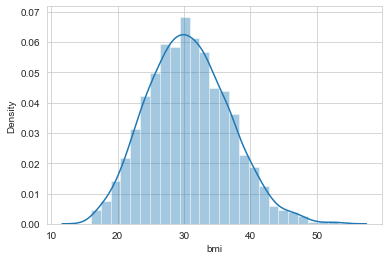

In [49]:
sns.distplot(data["bmi"])

In [26]:
print("Ortalama BMI :{:.2f}".format(data["bmi"].mean()))

Ortalama BMI :30.66


Text(0.5, 1.0, 'Bölgeye göre sağlık ödemesi')

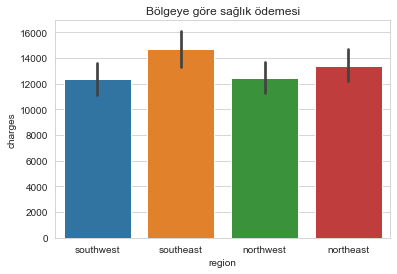

In [50]:
sns.barplot(x ="region", y="charges",data=data)
plt.title("Bölgeye göre sağlık ödemesi")

Text(0.5, 1.0, 'Kitle indeksine göre ödeme')

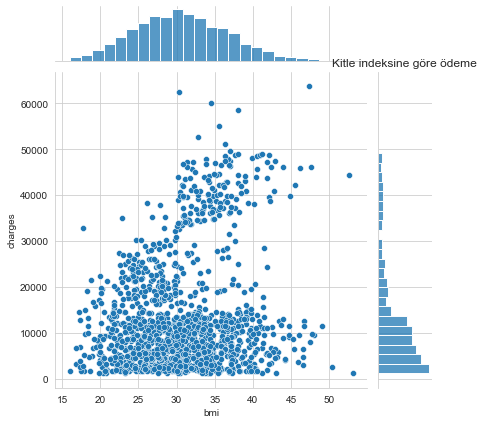

In [52]:
sns.jointplot(x="bmi",y="charges",data = data,kind="scatter")
plt.title("Kitle indeksine göre ödeme")

Text(0.5, 1.0, 'Kitle indeksine göre harcama-Sigara kullanıma göre ayrım')

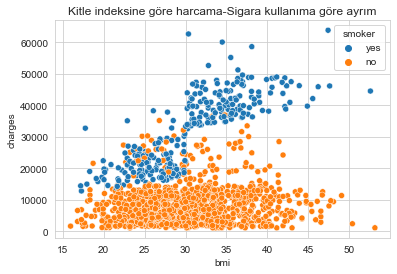

In [53]:
sns.scatterplot(x="bmi", y="charges",data=data, hue="smoker")
plt.title("Kitle indeksine göre harcama-Sigara kullanıma göre ayrım")

Text(0.5, 1.02, 'Sigara içme durumuna göre genel tablo')

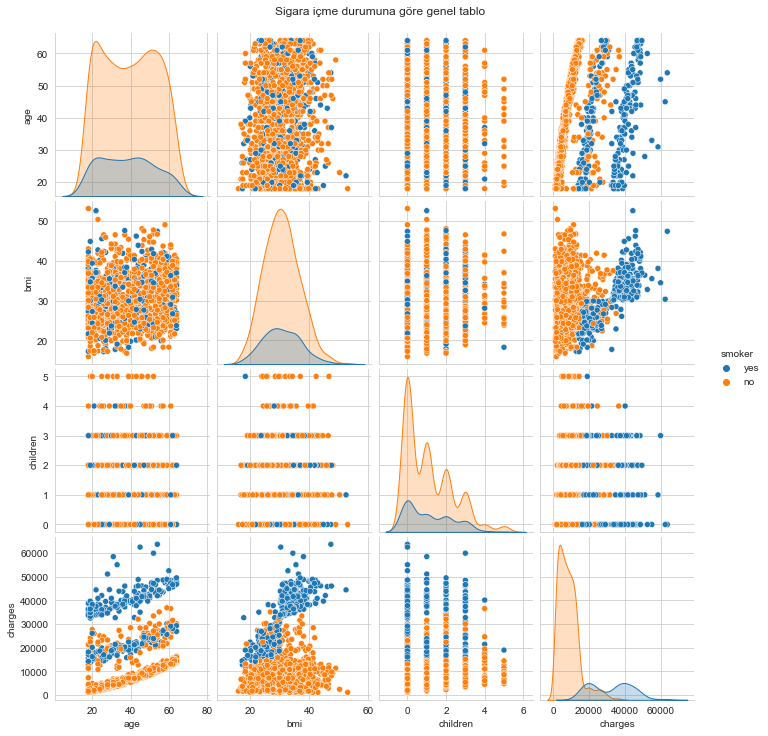

In [43]:
ax = sns.pairplot(data, hue = 'smoker')
ax.fig.suptitle("Sigara içme durumuna göre genel tablo",y=1.02)